In [ ]:
%load_ext autoreload
%autoreload 2

import sys, os
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
import scipy.sparse as sps
import scipy.sparse.linalg as LAS

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

time 25270.84999977251


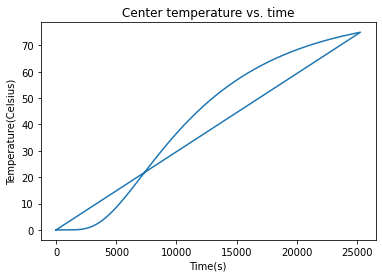

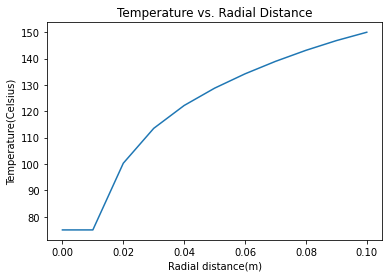

In [ ]:
# Setup basic domain
L = 0.1
D = 0.0000001

N = 10     # Number of lattice points
h = L / N  # Spatial step size

#radial distance
r = np.linspace(0, L, N+1)

# Setup final solution time + time-step
tf = 0
t = 0
k  = 0.05

w = np.zeros(N+1)
w_next = np.zeros(N+1)

#arbitrary large vectors
temp_center = np.zeros(30000000) #list of temperature at center of zero
t_list = np.zeros(30000000) #to plot

w[N] = 150 #boundary condition

while w[0] <= 75:  
      #set boundary conditions
      w[N] = 150
      w[0] = w[1] #no flux at center

      for i in range(1, N+1): 
          if i == 1:
              w_next[i] = (1 - (2*k*D/(h*h))*(1+1/i))*w[i] + (D*k/(h*h) + 2*D*k/(i*h*h))*w[i+1]
          elif i == N:
              w_next[i] = (D*k/(h*h))*w[i-1] + (1 - (2*k*D/(h*h))*(1+1/i))*w[i]
          else:
              w_next[i] = (D*k/(h*h))*w[i-1] + (1 - (2*k*D/(h*h))*(1+1/i))*w[i] + (D*k/(h*h) + 2*D*k/(i*h*h))*w[i+1]
    
      w = w_next
      temp_center[t] = w[0] 
      t_list[t] = tf 
      t = t + 1
      tf = tf + k
    
      #if t%1000000 == 0:
       # print("w =", w[0])
        
print("time", tf)
#print(temp_center)
plt.plot(t_list, temp_center)
plt.title('Center temperature vs. time')
plt.xlabel('Time(s)')
plt.ylabel('Temperature(Celsius)')
plt.show()
plt.plot(r, w)
plt.title('Temperature vs. Radial Distance')
plt.xlabel('Radial distance(m)')
plt.ylabel('Temperature(Celsius)')
plt.show()

